# 5. We have seen that we can fit an SVM with a non-linear kernel in order to perform classification using a non-linear decision boundary. We will now see that we can also obtain a non-linear decision boundary by performing logistic regression using non-linear transformations of the features.
## (a) Generate a data set with n = 500 and p = 2, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:

In [2]:
import numpy as np
import pandas as pd
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_moons, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

np.random.seed(0)
x1 = np.random.uniform(0, 1, 500) - 0.5
x2 = np.random.uniform(0, 1, 500) - 0.5
y = 1*(x1**2 - x2**2 > 0)

## (b) Plot the observations, colored according to their class labels. Your plot should display X1 on the x-axis, and X2 on the y- axis.

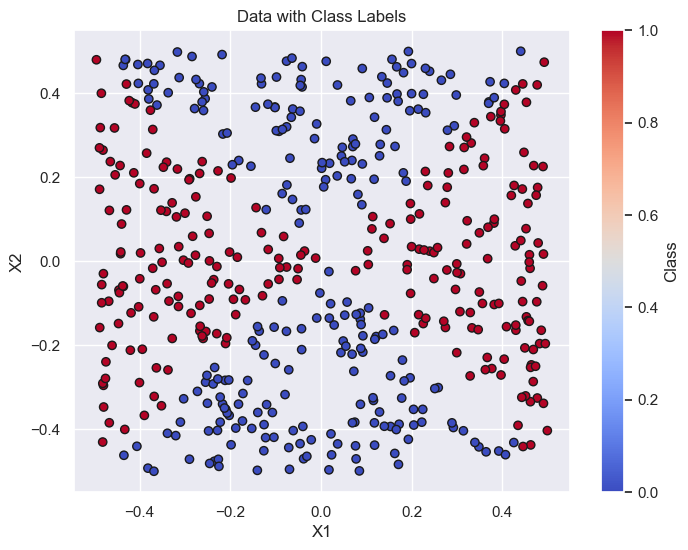

In [3]:
# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Data with Class Labels')
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

## (c) Fit a logistic regression model to the data, using X1 and X2 as predictors.
## (d) Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

Coefficients: [[0.34349407 0.12487558]]
Intercept: [-0.01427601]


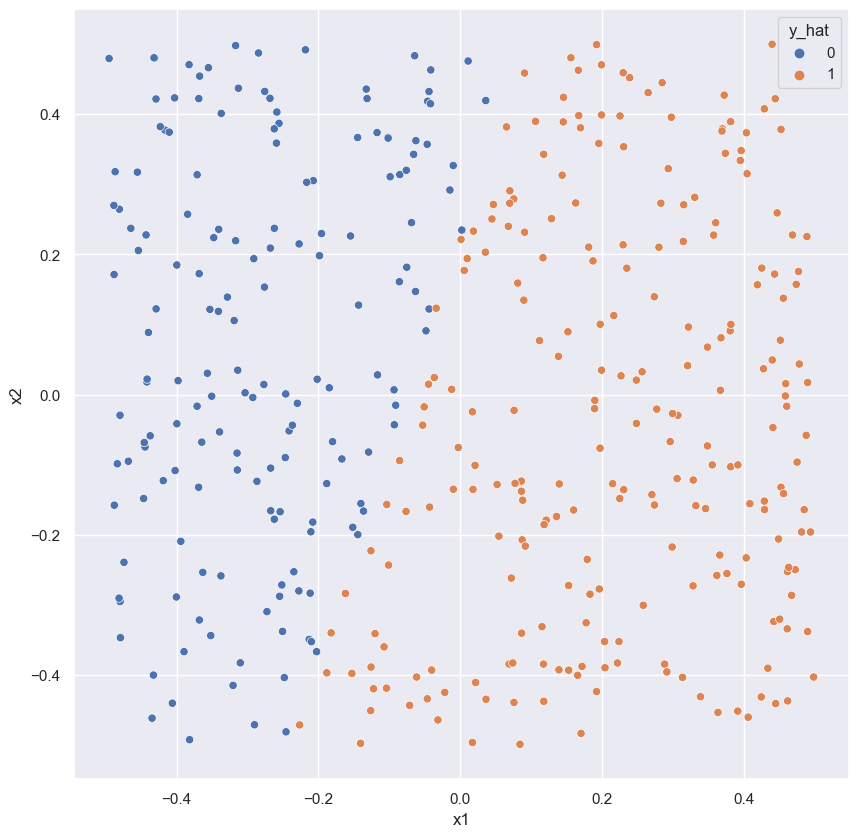

Training accuracy: 0.48878923766816146
Test accuracy    : 0.4151624548736462


In [15]:
# Reshape X1 and X2 into a 2D array
X = np.column_stack((x1, x2))
y = np.ravel(y)

train = np.random.random(len(y)) > 0.5
# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)
# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


# Predict class labels for training data
y_hat = model.predict(X_train)

# Plot data
plot_df = pd.DataFrame({'x1': X_train[:, 0], 'x2': X_train[:, 1], 'y_hat': y_hat})
plt.figure(figsize=(10, 10))
sns.scatterplot(x='x1', y='x2', hue='y_hat', data=plot_df)
plt.show()

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')



## (e) Now fit a logistic regression model to the data using non-linear functions of X1 and X2 as predictors (e.g. X12, X1 ×X2, log(X2), and so forth).
## (f) Apply this model to the training data in order to obtain a pre- dicted class label for each training observation. Plot the ob- servations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

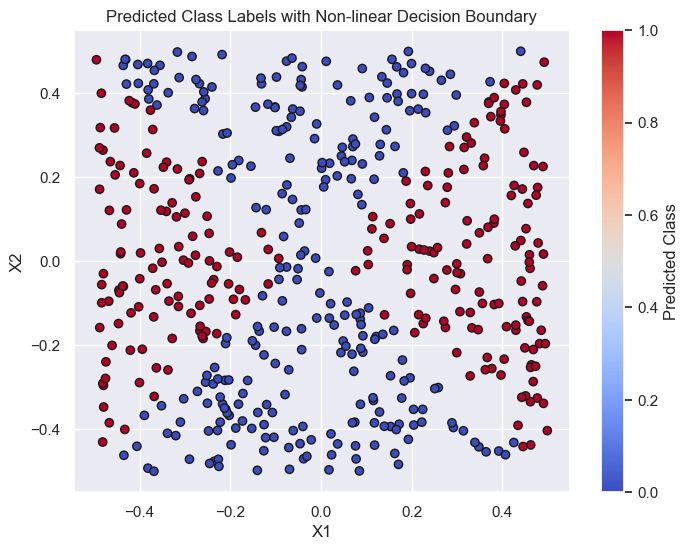

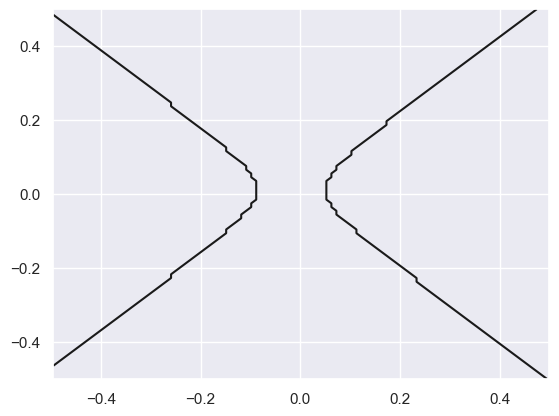

Training accuracy: 0.48878923766816146
Test accuracy    : 0.4151624548736462


In [16]:
from sklearn.preprocessing import PolynomialFeatures
# Create non-linear features
poly = PolynomialFeatures(degree=2)  # You can adjust the degree to introduce higher-order terms
X_nonlinear = poly.fit_transform(np.column_stack((x1, x2)))

# Create and fit the logistic regression model using non-linear features
model_nonlinear = LogisticRegression()
model_nonlinear.fit(X_nonlinear, y)

# Predict class labels for training data using the model with non-linear features
predicted_labels_nonlinear = model_nonlinear.predict(X_nonlinear)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=predicted_labels_nonlinear, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Predicted Class Labels with Non-linear Decision Boundary')
plt.colorbar(label='Predicted Class')
plt.grid(True)

plt.show()
x1_min, x1_max = x1.min(), x1.max()
x2_min, x2_max = x2.min(), x2.max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
X_grid = poly.transform(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = model_nonlinear.predict(X_grid)
Z = Z.reshape(xx1.shape)
plt.contour(xx1, xx2, Z, colors='k', levels=[0.5])

plt.show()
print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')

## (g) Fit a support vector classifier to the data with X1 and X2 as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

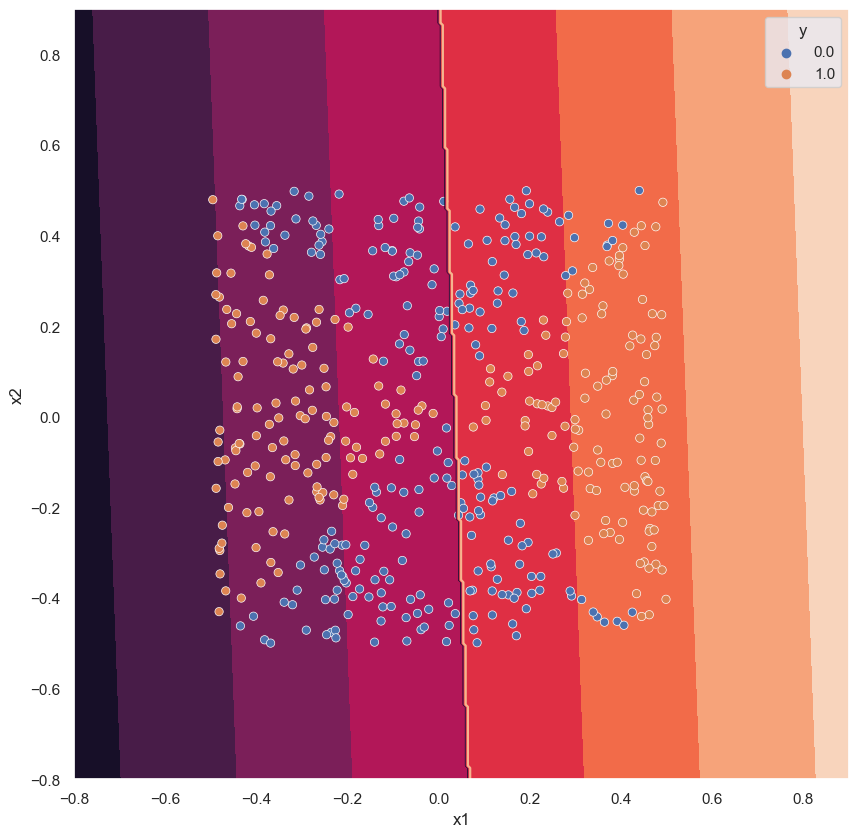

Training accuracy: 0.5964125560538116
Test accuracy    : 0.48375451263537905


In [22]:
def plot_clf(model, df, grid_range, show_contours=False, show_support_vectors=False):
    # Decision boundary plot
    
    # Get grid of values in given range
    x1 = grid_range
    x2 = grid_range
    xx1, xx2 = np.meshgrid(x1, x2, sparse=False)
    Xgrid = np.stack((xx1.flatten(), xx2.flatten())).T
    
    # Get decision boundary values for plot grid
    decision_boundary      = model.predict(Xgrid)
    decision_boundary_grid = decision_boundary.reshape(len(x2), len(x1))
    
    # Get decision function values for plot grid
    decision_function      = model.decision_function(Xgrid)
    decision_function_grid = decision_function.reshape(len(x2), len(x1))
    
    fig = plt.figure(figsize=(10, 10))
    if show_contours:
        plt.contourf(x1, x2, decision_function_grid);
    plt.contour(x1, x2, decision_boundary_grid);
    
    sns.scatterplot(x='x1', y='x2', hue='y', data=df)
    if show_support_vectors:
        sns.scatterplot(x=model.support_vectors_[:,0], y=model.support_vectors_[:,1], color='red', marker='+', s=500)
    plt.show();

f = 'y ~ x1 + x2 - 1'
y, X = pt.dmatrices(f, df)
y = np.ravel(y)

model = svm.SVC(kernel='linear', gamma=1, C=1, random_state=0, probability=True).fit(X[train], y[train])

plot_clf(model, df, np.arange(-.8, .9, .005), show_contours=True)

print(f'Training accuracy: {model.score(X[train], y[train])}')
print(f'Test accuracy    : {model.score(X[~train], y[~train])}')


# 7. In this problem, you will use support vector approaches in order to predict whether a given car gets high or low gas mileage based on the Auto data set.
## (a) Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.

In [31]:
location = "https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Auto.csv"
auto_df = pd.read_csv(location)
# Remove observations with missing values
auto_df = auto_df.drop(auto_df[auto_df.values == '?'].index)

# convet quantitive values to floats

quants = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
auto_df[quants] = auto_df[quants].astype(np.float64)
mpg_above_median =auto_df['mpg'].median()
auto_df['mpg_above_median'] = (auto_df['mpg'] > mpg_above_median) *1.
auto_df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_above_median
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,0.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,0.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,0.0


## (b) Fit a support vector classifier to the data with various values of cost, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of this parameter. Comment on your results.

In [35]:
f = 'mpg_above_median ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'
y, X = pt.dmatrices(f, auto_df)

# Scale data
X = preprocessing.scale(X)
y = np.ravel(y)


costs = np.logspace(-5, 2, 20)
scores = []
for i in costs:
    # Get cv score 
    model = svm.SVC(kernel='linear', C=i, random_state=0)
    score = np.mean(cross_val_score(model, preprocessing.scale(X), y, cv=5))
    scores += [[i, score]]
    #print(f'progress: {list(costs).index(i)} of {len(costs)}')

columns=['Cost', 'CV_accuracy']
results_df = pd.DataFrame(data=np.asarray(scores), columns=columns)

display(results_df)

,Cost,CV_accuracy
0,0.000010,0.630802
1,0.000023,0.630802
2,0.000055,0.630802
3,0.000127,0.630802
4,0.000298,0.681435
5,0.000695,0.818306
6,0.001624,0.877215
7,0.003793,0.882376
8,0.008859,0.902889
9,0.020691,0.895326


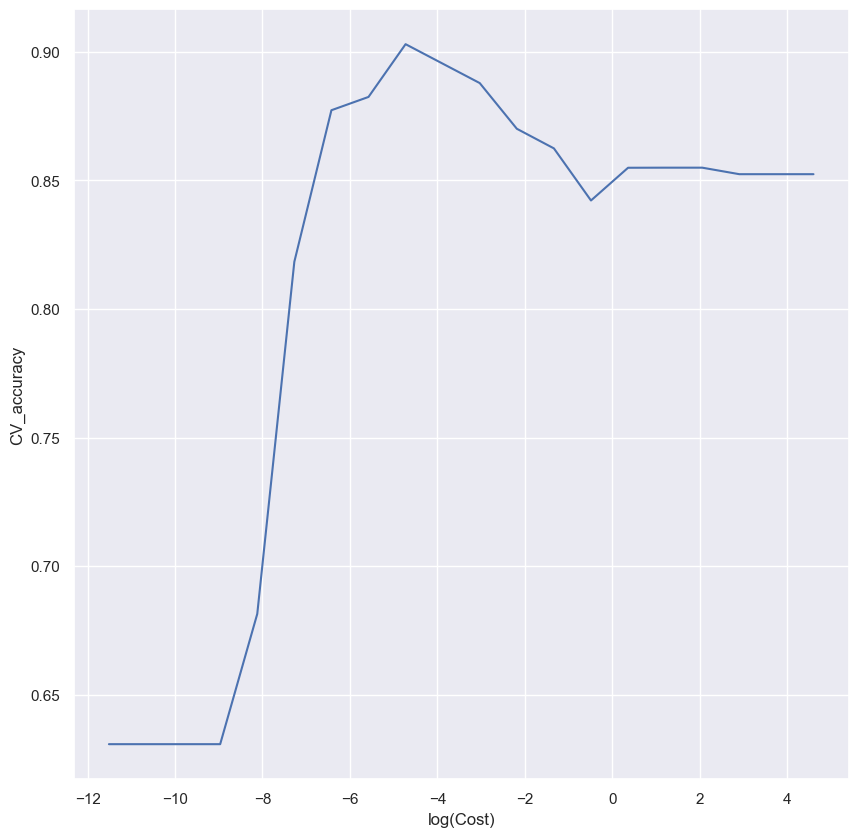

In [36]:
results_df['log(Cost)'] = np.log(results_df['Cost'])
plt.figure(figsize=(10,10))
sns.lineplot(x='log(Cost)', y='CV_accuracy', data=results_df);

Cost = 0.008859, we got highest accuracy 0.902889. When we transform cost to log(cost), log(cost) = -5 gets highest accuracy.

## (c) Now repeat (b), this time using SVMs with radial and polynomial basis kernels, with different values of gamma and degree and cost. Comment on your results.

In [37]:
# Grid search for best classifier
# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#sphx-glr-auto-examples-svm-plot-rbf-parameters-py
# ----------------------------------------------------------------

C_range     = np.logspace(-5, 3, 10)
gamma_range = np.logspace(-5, 3, 10)
kernels     = ['rbf', 'poly']
degrees     = [3, 5, 7, 9]    
param_grid  = dict(gamma=gamma_range, C=C_range, kernel=kernels, degree=degrees)
rbf_grid = GridSearchCV(svm.SVC(cache_size=2000), param_grid=param_grid, cv=5, 
                        scoring='accuracy', return_train_score=True)
rbf_grid.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(cache_size=2000),
             param_grid={'C': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'degree': [3, 5, 7, 9],
                         'gamma': array([1.00000000e-05, 7.74263683e-05, 5.99484250e-04, 4.64158883e-03,
       3.59381366e-02, 2.78255940e-01, 2.15443469e+00, 1.66810054e+01,
       1.29154967e+02, 1.00000000e+03]),
                         'kernel': ['rbf', 'poly']},
             return_train_score=True, scoring='accuracy')

In [38]:
pd.DataFrame(rbf_grid.cv_results_).sort_values('rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
526,0.001994,1.020097e-05,0.001393,4.906214e-04,2.154435,7,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 7, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
486,0.002194,4.011393e-04,0.001195,3.992616e-04,2.154435,3,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 3, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
546,0.001993,2.814551e-06,0.001193,3.965395e-04,2.154435,9,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 9, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
506,0.002014,3.129396e-05,0.001367,4.923930e-04,2.154435,5,0.004642,rbf,"{'C': 2.154434690031882, 'degree': 5, 'gamma':...",0.936709,...,0.902921,0.027958,1,0.916933,0.907348,0.923567,0.910828,0.917197,0.915175,0.005617
390,0.003987,1.907349e-07,0.001993,1.907349e-07,0.035938,9,0.278256,rbf,"{'C': 0.03593813663804626, 'degree': 9, 'gamma...",0.949367,...,0.900325,0.033167,5,0.900958,0.907348,0.917197,0.910828,0.914013,0.910069,0.005610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.005980,2.336015e-07,0.002990,9.536743e-08,0.000077,7,1000.0,rbf,"{'C': 7.742636826811278e-05, 'degree': 7, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
78,0.006557,4.739740e-04,0.003209,3.903622e-04,0.00001,9,1000.0,rbf,"{'C': 1e-05, 'degree': 9, 'gamma': 1000.0, 'ke...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
278,0.005979,1.761073e-06,0.002990,7.893059e-07,0.004642,5,1000.0,rbf,"{'C': 0.004641588833612777, 'degree': 5, 'gamm...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166
158,0.006378,4.878661e-04,0.002994,1.067136e-05,0.000077,9,1000.0,rbf,"{'C': 7.742636826811278e-05, 'degree': 9, 'gam...",0.493671,...,0.497468,0.003101,777,0.501597,0.501597,1.000000,1.000000,1.000000,0.800639,0.244166


The above table lists the models tested by grid search, ranked by cross-validation test scores.
A radial kernel performs best, with a mean CV accuracy of 0.903 which is the same as that achieved by the linear kernel (to 3 d.p.)

# 8. This problem involves the OJ data set which is part of the ISLR package.

In [40]:
location = "https://raw.githubusercontent.com/makbigc/ISLR/master/datasets/OJ.csv"
oj_df = pd.read_csv(location, index_col=0)
oj_df.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [41]:
from sklearn.model_selection import train_test_split

preds = "+".join(oj_df.columns.drop("Purchase"))
f = f'Purchase ~ {preds}'
y, X = pt.dmatrices(f, oj_df)
y = y[:, 0]

# scale data
X = preprocessing.scale(X)

# Split training test sets
test_size = len(y)-800
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)

C:\Users\spt904\AppData\Local\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


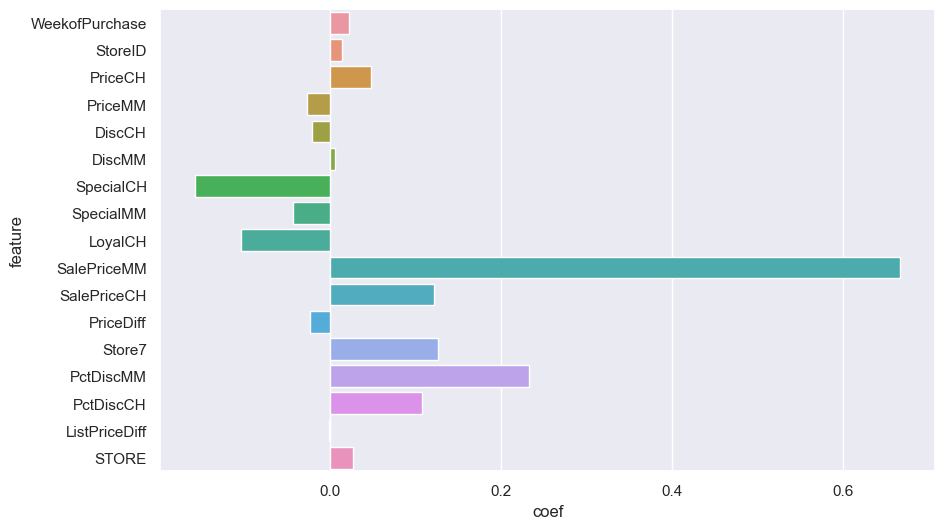

In [42]:
model = svm.LinearSVC(C=0.1, random_state=0).fit(X_train, y_train)

df = pd.DataFrame({'feature': oj_df.columns.drop('Purchase'),
              'coef': np.ravel(model.coef_)[1:]})
plt.figure(figsize=(10,6))
sns.barplot(x='coef', y='feature', data=df);

## (c) What are the training and test error rates?

In [43]:
accuracy_train = model.score(X_train, y_train)
accuracy_test  = model.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.840
test accuracy : 0.830


## (d) Use the tune() function to select an optimal cost. Consider values in the range 0.01 to 10.

In [45]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(svm.SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1, 'gamma': 0.5}

## (e) Compute the training and test error rates using this new value for cost.

In [46]:
accuracy_train = clf.score(X_train, y_train)
accuracy_test  = clf.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.869
test accuracy : 0.793


## (g) Repeat parts (b) through (e) using a support vector machine with a polynomial kernel. Set degree=2.

In [48]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10],
                     'gamma': [0.5, 1,2,3,4]}]
clf = GridSearchCV(svm.SVC(kernel='poly', degree = 2), tuned_parameters, cv=10, scoring='accuracy',return_train_score=True)
clf.fit(X_train, y_train)
clf.best_params_

{'C': 1, 'gamma': 1}

In [49]:
accuracy_train = clf.score(X_train, y_train)
accuracy_test  = clf.score(X_test, y_test)
print(f'train accuracy: {accuracy_train:.3f}')
print(f'test accuracy : {accuracy_test:.3f}')

train accuracy: 0.811
test accuracy : 0.748


## (h) Overall, which approach seems to give the best results on this data?
Support vector machine with radial kernel and cost chosen by grid search.